<a href="https://colab.research.google.com/github/binodsth2/Blood_Sugar_Detection_using_machine_Learning/blob/main/Sugar_Level_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [25]:
# Uploading the dataset
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning/diabetes.csv')
df.shape
df.head()
#df.tail()
#df.info()

# Here the data in clear so we donot need to purify the data further so Directly the further process is started.


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [27]:
x=df.drop('Diabetes_012', axis=1)
y=df['Diabetes_012']

In [28]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

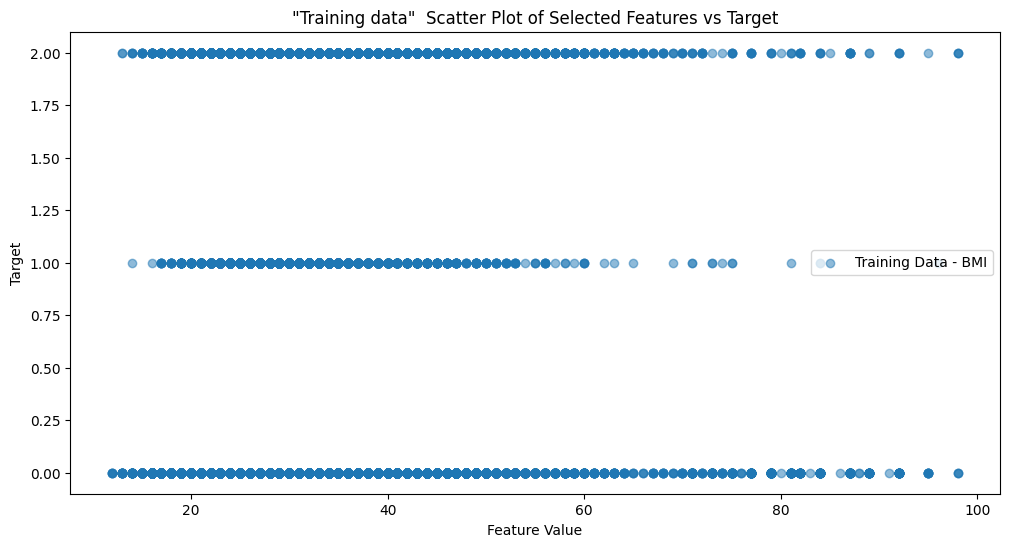

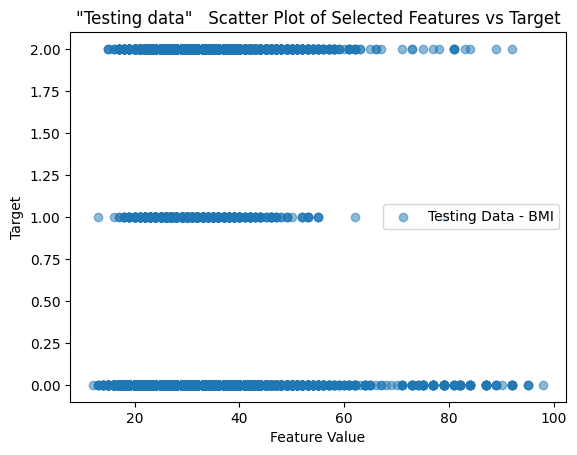

In [29]:
#Scatter plt
plt.figure(figsize=(12, 6))

# Select a few columns for plotting
cols_to_plot = ['BMI', 'BloodPressure', 'Glucose']

for col in cols_to_plot:
    if col in x_train.columns and col in x_test.columns:
        plt.scatter(x_train[col], y_train, label=f'Training Data - {col}', alpha=0.5)
        #plt.scatter(X_test[col], y_test, label=f'Testing Data - {col}', alpha=0.5)

plt.title('"Training data"  Scatter Plot of Selected Features vs Target')
plt.xlabel('Feature Value')
plt.ylabel('Target')
plt.legend()
plt.show()


for col in cols_to_plot:
    if col in x_train.columns and col in x_test.columns:
        #plt.scatter(X_train[col], y_train, label=f'Training Data - {col}', alpha=0.5)
        plt.scatter(x_test[col], y_test, label=f'Testing Data - {col}', alpha=0.5)

plt.title('"Testing data"   Scatter Plot of Selected Features vs Target')
plt.xlabel('Feature Value')
plt.ylabel('Target')
plt.legend()
plt.show()

In [30]:
# * Scaling features *
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [31]:
# Training the model

# RandomForest
rf_model= RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42)
rf_model.fit(x_train_scaled, y_train)
rf_pred=rf_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, rf_pred))


# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_scaled, y_train)
xgb_pred = xgb_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, xgb_pred))


#Bagging Classifier
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(x_train_scaled, y_train)
bag_pred = bag_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, bag_pred))

Accuracy: 0.8383790602333648
Accuracy: 0.8504415011037527
Accuracy: 0.8358759066540523


In [32]:
#Making prediction
y_pred = model.predict(x_test_scaled)

In [33]:
# * Evaluate the model *
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8410990223904131

Confusion Matrix:
 [[41294    31  1470]
 [  845     0    99]
 [ 5610     7  1380]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736

